Plots.AnimatedGif("d:\\code\\大三课程\\最优化方法\\作业.ipynb\\gradient_descent.gif")
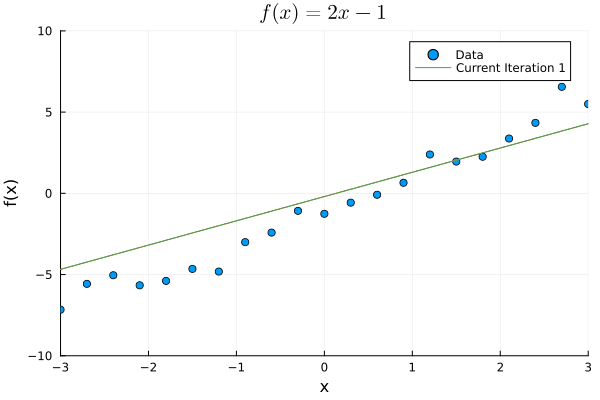

┌ Info: Saved animation to d:\code\大三课程\最优化方法\作业.ipynb\gradient_descent.gif
└ @ Plots C:\Users\86183\.julia\packages\Plots\sxUvK\src\animation.jl:156


In [2]:
##############################################
                    #第一问#
##############################################
using Plots

x = -3:0.3:3
m = length(x)
y = 2x .- 1
y += 1.2 * randn(m)
scatter(x, y, label="Data")

function loop(x, y)
    m = length(x)
    w, b = 0, 0
    η = 0.01
    # 存储每一步的参数值
    w_history, b_history = Float64[], Float64[]
    # 创建动画对象
    anim = @animate for i in 1:100
        error = w .* x .+ b .- y
        gw = x' * error
        gb = sum(error)
        w -= η * gw
        b -= η * gb
        
        # 存储当前的参数值
        push!(w_history, w)
        push!(b_history, b)
        
        # 清空之前的图像，只保留数据点
        plot(x, y, seriestype = :scatter, label="Data")
        
        # 绘制之前的拟合线
        for j in 1:i
            plot!(x, w_history[j] .* x .+ b_history[j], label="", legend=false)
        end
        # 绘制当前拟合线
        plot!(x, w .* x .+ b, label="Current Iteration $i", legend=:topright, xlims=(-3, 3), ylims=(-10, 10))
        xlabel!("x")
        ylabel!("f(x)")
        title!("\$f(x) = 2x - 1\$")
    end
    
    gif(anim, "gradient_descent.gif", fps = 10)
end
loop(x, y)

┌ Info: Saved animation to d:\code\大三课程\最优化方法\作业.ipynb\quadratic_gradient_descent.gif
└ @ Plots C:\Users\86183\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("d:\\code\\大三课程\\最优化方法\\作业.ipynb\\quadratic_gradient_descent.gif")
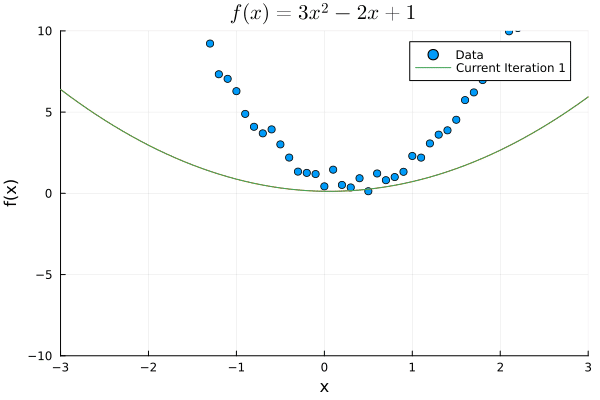

In [2]:
##############################################
                    #第二问#
##############################################
using Plots

# 生成二次函数的数据
x = -3:0.1:3
m = length(x)
y = 3 .* x.^2 .- 2 .* x .+ 1
y += 0.5 * randn(m)  # 减小数据噪声

# 存储每一步的参数值
a_history, b_history, c_history = Float64[], Float64[], Float64[]

function quadratic_gradient_descent(x, y)
    a, b, c = 0, 0, 0
    η = 0.0001
    
    # 创建动画对象
    anim = @animate for i in 1:100
        # 计算梯度
        prediction = a * x.^2 .+ b * x .+ c
        error = prediction - y
        ga = sum(2 * x.^2 .* error)
        gb = sum(2 * x .* error)
        gc = sum(2 * error)
        
        # 更新参数
        a -= η * ga
        b -= η * gb
        c -= η * gc
        
        # 存储当前的参数值
        push!(a_history, a)
        push!(b_history, b)
        push!(c_history, c)
        
        # 清空之前的图像，只保留数据点
        plot(x, y, seriestype = :scatter, label="Data")
        # 绘制之前的拟合曲线，并删除之前的标签
        for j in 1:i
            plot!(x, a_history[j] .* x.^2 .+ b_history[j] .* x .+ c_history[j], label="", legend=false)
        end
        # 绘制当前的拟合曲线
        plot!(x, a .* x.^2 .+ b .* x .+ c, label="Current Iteration $i", legend=:topright, xlims=(-3, 3), ylims=(-10, 10))
        
        xlabel!("x")
        ylabel!("f(x)")
        title!("\$f(x) = 3x^2 - 2x + 1\$")
    end
    gif(anim, "quadratic_gradient_descent.gif", fps = 20)
end
quadratic_gradient_descent(x, y)

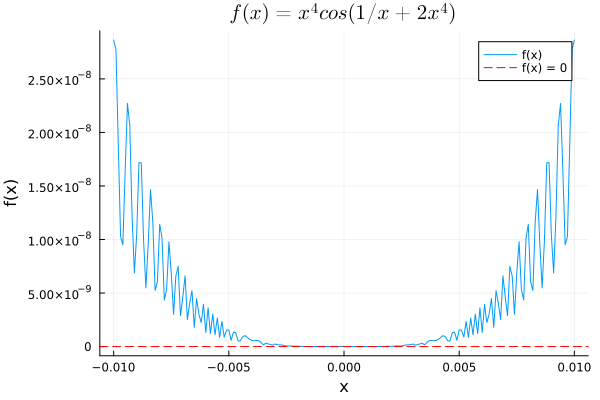

In [5]:
##############################################
                    #第三问#
##############################################

using Plots
# 定义函数
f(x) = x == 0 ? 0 : x^4 * cos(1 / x) + 2 * x^4
# 生成 x 值的范围
x_values1 = -0.01:0.0001:0.01
# 计算对应的 y 值
y_values1 = f.(x_values1)
# 绘制函数图像
plot(x_values1, y_values1, label="f(x)",legend=:topright)
# 标出 f(x) = 0 的零点
hline!([0], color=:red, linestyle=:dash, label="f(x) = 0")

# 设置图形参数
xlabel!("x")
ylabel!("f(x)")
title!("\$f(x) = x^4cos(1/x + 2x^4)\$")

In [1]:
# ##############################################
#                     #第四问#
# ##############################################
m = 1000;n = 2000;
a = randn(m,n);
@time a' * a;
@time a * a';

  0.641882 seconds (1.45 M allocations: 130.106 MiB, 3.65% gc time, 93.63% compilation time)
  0.030063 seconds (14.22 k allocations: 8.939 MiB, 25.22% compilation time)


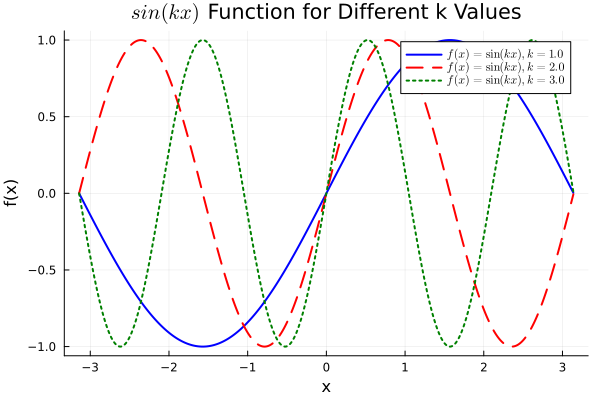

In [2]:
##############################################
                    #第五问#
##############################################
using Plots

# 定义函数
f(x, k) = sin(k * x)
# 生成 x 值的范围
x_values2 = -π:0.01:π 
# 设置不同的 k 值
k_values2 = [1.0, 2.0, 3.0]
# 自定义线条的颜色、宽度和样式
line_colors = [:blue, :red, :green]
line_widths = [2, 2, 2]
line_styles = [:solid, :dash, :dot]
# 绘制不同 k 值对应的函数图像
for (i, k) in enumerate(k_values2)
    y_values2 = sin.(k * x_values2)
    plot!(x_values2, y_values2, label="\$f(x) = \\sin(kx), k = $k\$", linecolor=line_colors[i], linewidth=line_widths[i], linestyle=line_styles[i],legend=:topright)
end
# 设置图形参数
xlabel!("x")
ylabel!("f(x)")
title!("\$sin(kx)\$ Function for Different k Values")

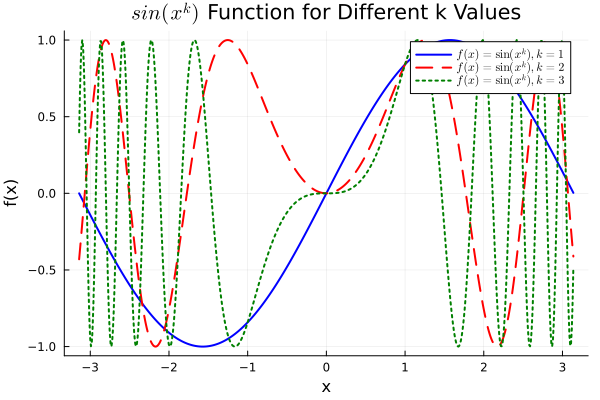

In [1]:

using Plots

# 定义函数
f(x, k) = sin(x^k)
# 生成 x 值的范围
x_values3 = -π:0.01:π  
# 设置不同的 k 值
k_values3 = [1, 2, 3]
# 自定义线条的颜色、宽度和样式
line_colors = [:blue, :red, :green]
line_widths = [2, 2, 2]
line_styles = [:solid, :dash, :dot]
# 绘制不同 k 值对应的函数图像
for (i, k) in enumerate(k_values3)
    y_values3 = f.(x_values3,k)
    plot!(x_values3, y_values3, label="\$f(x) = \\sin(x^k), k = $k\$", linecolor=line_colors[i], linewidth=line_widths[i], linestyle=line_styles[i],legend=:topright)
end
# 设置图形参数
xlabel!("x")
ylabel!("f(x)")
title!("\$sin(x^k)\$ Function for Different k Values")
